In [8]:
#imports numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
#replaced cross_validation with model_selection
from sklearn.model_selection import train_test_split



In [9]:
#data
rawData = pd.read_csv(r"C:\Users\i_seg\OneDrive\BIG DATA\DATA ANALISYS\MODULE5\Task2\default of credit card clients.csv", header =1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [10]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [11]:
#features
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [12]:
#dependent variable
depVar = rawData['PAY_AMT6']

In [13]:
#Training Set (Feature Space: X Training)
X_train = (features[: 1000])
X_train.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [14]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0       0
1    2000
2    5000
3    1000
4     679
Name: PAY_AMT6, dtype: int64

In [15]:
#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
29900      16809          0          0          0          0          0   
29901      50845      48750     103486      50590      50248      49387   
29902      10392     168088     168955     161351     126198     124746   
29903      27378      17082      13333         99         99     172104   
29904      54952      56021      54126      58732      59306      59728   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  
29900         0         0         0         0         0  
29901         0      6556      3250      1563      1208  
29902    168096      6409      7335      4448      4519  
29903     10018     13333        99        99    172104  
29904      2600      4553      5800      2000      1000  


In [16]:
#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


29900        0
29901      781
29902     5003
29903    30013
29904     1462
Name: PAY_AMT6, dtype: int64

In [17]:
#implement cross validation
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [18]:
#check the split
X_train.shape, X_test.shape

((750, 11), (250, 11))

In [19]:
#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()


In [20]:
#features
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [21]:
#dependent variable
print(depVar)

0           0
1        2000
2        5000
3        1000
4         679
         ... 
29995    1000
29996       0
29997    3100
29998    1804
29999    1000
Name: PAY_AMT6, Length: 30000, dtype: int64


In [22]:
#Random Forest
modelRF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [23]:
modelSVR.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [24]:
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
print(cross_val_score(modelRF, X_train, y_train)) 

[ 0.07848832  0.15515722  0.26527611 -0.03862658 -0.04472635]


In [26]:
print(cross_val_score(modelSVR, X_train, y_train)) 

[-0.03067741 -0.09139392 -0.0343823  -0.04689222 -0.10935053]


In [27]:
print(cross_val_score(modelLR, X_train, y_train)) 

[ 0.06279663 -1.19536344 -2.39341848 -0.00809441 -0.61264896]


In [28]:
#Model Fitting
#random forest is the model with the best performance based on R-Squared. 
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

[ 0.08463878  0.19357641  0.1663361  -0.0356367  -0.00784354]


0.8527934180617102

In [29]:
#SVR
modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train)) 
modelSVR.score(X_train,y_train)

[-0.03067741 -0.09139392 -0.0343823  -0.04689222 -0.10935053]


-0.0348790789684732

In [30]:
#LR
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train)) 
modelLR.score(X_train,y_train)

[ 0.06279663 -1.19536344 -2.39341848 -0.00809441 -0.61264896]


0.5573164480937475

In [31]:
#Make Predictions
predictions = modelRF.predict(X_test)
#Establish a variable and use the included function, the ground truth, and the predictions to calculate R Squared 
predRsquared = r2_score(y_test,predictions)
#calculating RMSE
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.020
RMSE: 37321.809


In [32]:
y_test=np.array(y_test)

In [33]:
y_test

array([     0,      0,    600,      0,   2300,   7009,      0,      0,
            0,   2213,    832,  20000,   2420,   1700,      4,      0,
          690,      0,  10000,   2000,   2800,   8546,      0,    325,
         5656,   3800,   1883,    200,      0,      0,   2100,  12031,
         3050,      0,    938,   1000,   2502,      0,    200,   3000,
          744,      0,   4699,   3900, 528666,   3519,  23000,   2130,
            0,   8000,   5000,  13000,   4976,      0,   5000,   3000,
         1069,      0,   1000,   4985,   2500,   9435,      0,      0,
          390,   6000,   4221,      0,   1751,   5000,  13899,   5000,
            0,   2111,   2000,    500,   2000,      0,    385,      0,
         1035,   2000,      0,   5000,      0,      0,   1590,      0,
         2380,   2000,    500,   5100,    500,   5350,    687, 126685,
          641,   6288,   4000,      1,      0,   2500,      0,   3100,
            0,   2500,   1362,   2000,      0,    319,   3100,   2000,
      

In [34]:
predictions

array([5.31641619e+02, 6.18900000e+01, 6.56850000e+02, 3.36819625e+01,
       2.27927000e+03, 7.59789000e+03, 3.65235000e+03, 4.50420000e+02,
       1.34593800e+04, 8.43850000e+02, 3.34687000e+03, 2.67266400e+04,
       4.83225000e+03, 1.56823000e+03, 8.78650000e+02, 1.46558000e+03,
       6.87226000e+03, 9.21633423e+01, 2.69981000e+03, 2.09690000e+03,
       3.07226000e+03, 8.59547000e+03, 1.72550000e+02, 1.03154000e+03,
       3.20163000e+03, 5.00595000e+03, 4.79522372e+02, 8.77470000e+02,
       9.21633423e+01, 9.21633423e+01, 5.67720000e+03, 1.01600900e+04,
       3.64140000e+03, 6.25200000e+01, 3.63782000e+03, 2.33088000e+03,
       2.03599000e+03, 9.21633423e+01, 4.05482727e+02, 3.35587000e+03,
       2.58260000e+03, 9.21633423e+01, 8.48720000e+03, 4.58757000e+03,
       6.86785000e+03, 4.66387000e+03, 1.28379400e+04, 1.23393000e+03,
       1.10124231e+02, 5.01694000e+03, 3.08430000e+03, 4.70141000e+03,
       1.91194000e+03, 1.38042000e+03, 4.81986000e+03, 5.70749000e+03,
      

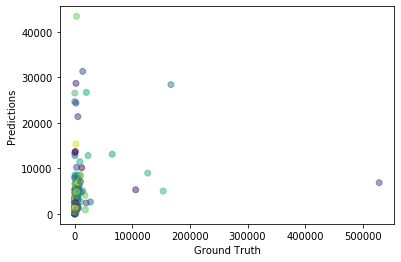

In [38]:
# Plotting the Results
colors = np.random.random(len(predictions))
#area = (30 * np.random.rand(250))**2  # 0 to 15 point radii
#plt.scatter(y_test, predictions,  c=colors, alpha = 0.5)
plt.scatter(y_test, predictions,  c=colors, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();